### Single perceptron TLU (threshold logic unit) network 


In [99]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris=load_iris()
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris['target']=iris.target
iris
per_clf=Perceptron()
per_clf.fit(x,y)
y_read=per_clf.predict([[20000000,5000,0,3]])
y_read


c:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1])

### Regression MLP using sequential API 


In [100]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense,Layer
from sklearn.metrics import mean_squared_error

housing=fetch_california_housing()
X_train_full,X_test,Y_train_full,Y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,Y_train_full)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,Y_test)
X_new=X_test[:3]    ### pretend these are new instances , first 3 new sample as the unseen data 
y_pred=model.predict(X_new)
y_pred


c:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0802 - val_loss: 1.3187
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1017 - val_loss: 0.4669
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4636 - val_loss: 0.4337
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4303 - val_loss: 0.4200
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4505 - val_loss: 0.4097
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4043 - val_loss: 0.3946
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3949 - val_loss: 0.3956
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3917 - val_loss: 0.3892
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4009 - val_loss: 0.4060
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3946 - val_loss: 0.3862
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3802 - val_loss: 0.3831
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

array([[3.6013246],
       [1.8738985],
       [1.853816 ]], dtype=float32)

## Building Complex Models using the Functional API 

In [101]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(20,activation="relu")(input)
hidden2=keras.layers.Dense(10,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input],outputs=[output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
y_pred=model.predict(X_new)
y_pred
msetest=model.evaluate(X_test,Y_test)
print(model.summary)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4522 - val_loss: 0.9219
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8132 - val_loss: 0.7208
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7070 - val_loss: 0.6607
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6553 - val_loss: 0.6157
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6168 - val_loss: 0.5827
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5871 - val_loss: 0.5574
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5633 - val_loss: 0.5364
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5444 - val_loss: 0.5195
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5293 - val_loss: 0.5069
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5170 - val_loss: 0.4962
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5070 - val_loss: 0.4882
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

####  if you want to send a subset of the features through the wide path and a
#### different subset throught deep path . in this casae one solution is to use multiple features . 

In [102]:
X_test

array([[ 0.89623063, -0.8499143 ,  0.92285739, ..., -0.03985591,
        -0.48237318, -0.25058361],
       [-0.51161076,  1.06293349, -0.14133002, ..., -0.07619946,
        -0.74841654,  0.61136496],
       [-0.88579443,  0.74412552, -0.65380198, ...,  0.0956109 ,
        -0.32368066, -0.48973697],
       ...,
       [-1.02492016, -1.16872226, -0.44862206, ..., -0.06560685,
         1.35192574, -0.90825535],
       [ 2.36918222,  0.0268076 ,  0.56781269, ..., -0.10528548,
        -0.71574455,  0.59641787],
       [ 0.11629471, -1.00931828, -0.04754792, ..., -0.03053614,
        -0.64573314,  0.45192938]])

In [103]:
# Input() does NOT contain data.
# It only defines the shape and position where data will enter the model.
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_A,hidden2])
output=keras.layers.Dense(1,name='output')(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])
model.compile(loss="mean_squared_error",optimizer="sgd")
model.summary()
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict([X_test_A, X_test_B])
# Returns loss on test data
print("evaluation of the model ",model.evaluate([X_test_A, X_test_B],Y_test))
history=model.fit([X_train_A,X_train_B],y_train,epochs=10,validation_data=(([X_valid_A,X_valid_B],y_valid)))

Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_134 (Dense)   │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_135 (Dense)   │ (None, 30)        │        930 │ dense_134[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_44      │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_135[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_44[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 5.2362
evaluation of the model  5.236174583435059
Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9314 - val_loss: 0.5222
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4943 - val_loss: 0.4659
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4694 - val_loss: 0.4488
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338 - val_loss: 0.4238
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4214 - val_loss: 0.4172
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4226 - val_loss: 0.4060
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4037 - val_loss: 0.4048
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4172 - val_loss: 0.4022
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3999 - val_loss: 0.5948
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4054 - val_loss: 0.38

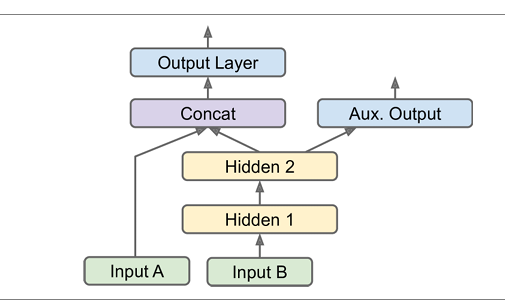

In [104]:
output=keras.layers.Dense(1,name="main_output")(concat)
aux_output=keras.layers.Dense(1,name="aux_output")(hidden2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))
model.evaluate([X_test_A,X_test_B],[Y_test,Y_test])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.6401 - loss: 0.7759 - main_output_loss: 0.6796 - val_aux_output_loss: 1.0244 - val_loss: 0.4868 - val_main_output_loss: 0.4269
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 0.8897 - loss: 0.4608 - main_output_loss: 0.4130 - val_aux_output_loss: 0.8678 - val_loss: 0.4499 - val_main_output_loss: 0.4034
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 0.7756 - loss: 0.4383 - main_output_loss: 0.4007 - val_aux_output_loss: 0.7706 - val_loss: 0.4321 - val_main_output_loss: 0.3945
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.7014 - loss: 0.4219 - main_output_loss: 0.3908 - val_aux_output_loss: 0.6904 - val_loss: 0.4181 - val_main_output_loss: 0.3878
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 0.6420 - loss: 0.4102 - main_output_loss: 0.3846 - val_aux_output_loss: 0.6385 - val_loss: 0.4205 - val_main_output_loss: 0.3962


[0.34541431069374084, 0.3343663215637207, 0.46604928374290466]

loss              → weighted total loss (0.9*main_loss + 0.1*aux_loss)
main_output_loss  → loss of main output
aux_output_loss   → loss of auxiliary output

val_loss

val_main_output_loss

val_aux_output_loss


In [105]:
X_train[0]

array([ 1.07364392,  0.10650959, -0.21908634, -0.45745938,  0.11323845,
       -0.07197925,  0.76849733, -1.21716177])

# Using the Subclassing API to Build Dynamic Models
## Subclassing API 
You write your own model class (class MyModel(tf.keras.Model)).
The call() method defines forward computation manually. Ideal for dynamic models, loops, conditional logic. More flexible but harder to debug/visualize, no shape checking upfront.

| API         | Style            | Usage                         |
| ----------- | ---------------- | ----------------------------- |
| Sequential  | Simple & linear  | Basic models                  |
| Functional  | Graph-based      | Complex architectures         |
| Subclassing | Custom & dynamic | Research, experimental models |


In [106]:
class WideAndDeepModel(keras.Model):
    
    def __init__(self, units=30, activation="relu", **kwargs):
      super().__init__(**kwargs) # handles standard args (e.g., name)
      self.hidden1 = keras.layers.Dense(units, activation=activation)
      self.hidden2 = keras.layers.Dense(units, activation=activation)
      self.main_output = keras.layers.Dense(1)
      self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
     input_A, input_B = inputs
     hidden1 = self.hidden1(input_B)
     hidden2 = self.hidden2(hidden1)
     concat = keras.layers.concatenate([input_A, hidden2])
     main_output = self.main_output(concat)
     aux_output = self.aux_output(hidden2)
     print("the main_output and aux_output is ")
     return main_output, aux_output
model2 = WideAndDeepModel()
model2.call([X_test_A,X_test_B])

# This example looks very much like the Functional API, except we do not need to cre
# ate the inputs; we just use the input argument to the call() method, and we separate
# the creation of the layers21 in the constructor from their usage in the call() method.

# This extra flexibility does come at a cost: your model’s architecture is hidden within
# the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and
# when you call the summary() method, you only get a list of layers, without any infor
# mation on how they are connected to each other. Moreover, Keras cannot check types
# and shapes ahead of time, and it is easier to make mistakes. So unless you really need
# that extra flexibility, you should probably stick to the Sequential API or the Func
# tional API


the main_output and aux_output is 


(<tf.Tensor: shape=(5160, 1), dtype=float32, numpy=
 array([[ 0.9864853 ],
        [-0.47416008],
        [-0.8002849 ],
        ...,
        [ 0.21453577],
        [ 0.7741438 ],
        [ 0.613582  ]], dtype=float32)>,
 <tf.Tensor: shape=(5160, 1), dtype=float32, numpy=
 array([[ 0.00397056],
        [ 0.12462085],
        [-0.1231418 ],
        ...,
        [-0.32906657],
        [-0.07171199],
        [-0.05078518]], dtype=float32)>)

## Saving and Restoring a Model

In [120]:
model = keras.models.load_model("my_keras_model.h5", compile=False)
model.compile(optimizer="sgd", loss="mse", metrics=["mse"])   # recompile manually

model.save("my_model.h5")   # creates a folder model/
# Later load



## using callbacks , early stopping 


Callbacks are tools that automatically run during training in neural networks. They observe the model while it trains and take action when certain conditions are met. They act like assistants that monitor training, stop it, save models, reduce learning rate, log performance, etc.

Why we need Callbacks

During training many problems can occur:

Overfitting after few epochs

Loss stops decreasing or gets stuck

Need to save best model automatically

Want to check accuracy/loss after each epoch

Need dynamic adjustment of learning rate

Callbacks solve these issues without manual intervention.

What Callbacks do (Conceptual View)

During training:

Start Training →
    Before each epoch → callback actions
    During each batch → callback actions (optional)
    After epoch ends → callback actions
    If condition met (no improvement / overfit) → stop, save, reduce LR, etc.
End Training

Most Important Callbacks (Theory)
1. EarlyStopping

Stops training when model isn't improving anymore.

Prevents overfitting

Saves time

Example concept:

If val_loss doesn't improve for 5 epochs → stop training
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",     # what to monitor
    patience=5,              # stop if no improvement for 5 epochs
    restore_best_weights=True # revert to best weights
)


2. ModelCheckpoint

Saves model automatically during training.

Can save only the best model

Useful for large trainings

Concept:

If val_loss improved → save model weights
checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.h5",         # file name to save
    monitor="val_loss",
    save_best_only=True      # saves only best version
)

3. ReduceLROnPlateau

Reduces learning rate when training stagnates.

Helps model escape plateaus

Stabilizes training

Concept:

If no improvement for 3 epochs → lr = lr * 0.1
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,              # multiply lr by 0.2 (reduce 5x)
    patience=3,              # wait 3 epochs before reducing
    min_lr=1e-6              # lower limit
)

4. TensorBoard

Visualizes training metrics (loss, accuracy, graphs)

Concept:

Tracks and logs training to visualize curves later
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,              # multiply lr by 0.2 (reduce 5x)
    patience=3,              # wait 3 epochs before reducing
    min_lr=1e-6              # lower limit
)

5. LearningRateScheduler

Changes LR dynamically according to a function.
You define how LR changes each epoch.

Concept:

lr = lr0 * 0.95^epoch
def lr_schedule(epoch, lr):
    return lr * 0.95          # decrease 5% every epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

6. CSVLogger

Stores training logs in a CSV file for later analysis.

Concept:

Epoch | Loss | val_loss | lr | ...
csv_logger = keras.callbacks.CSVLogger("training_log.csv")

7. TerminateOnNaN

Stops training when loss becomes NaN.
Useful when model diverges.
nan_stop = keras.callbacks.TerminateOnNaN()


| Callback Type              | Purpose                         |
| -------------------------- | ------------------------------- |
| Prevent overfitting        | EarlyStopping                   |
| Save progress              | ModelCheckpoint                 |
| Adjust learning rate       | ReduceLROnPlateau, LR Scheduler |
| Monitoring & Visualization | TensorBoard, CSVLogger          |
| Avoid bad training states  | TerminateOnNaN                  |
